Epoch 1/10
750/750 [==============================] - 5s 4ms/step - loss: 0.9630 - accuracy: 0.7646 - val_loss: 0.4231 - val_accuracy: 0.8929
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3886 - accuracy: 0.8939 - val_loss: 0.3210 - val_accuracy: 0.9100
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3195 - accuracy: 0.9100 - val_loss: 0.2801 - val_accuracy: 0.9218
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2838 - accuracy: 0.9198 - val_loss: 0.2566 - val_accuracy: 0.9281
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2589 - accuracy: 0.9262 - val_loss: 0.2378 - val_accuracy: 0.9344
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2387 - accuracy: 0.9315 - val_loss: 0.2209 - val_accuracy: 0.9388
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2220 - accuracy: 0.9379 - val_loss: 0.2081 - val_accuracy: 0.9420
Epoch 

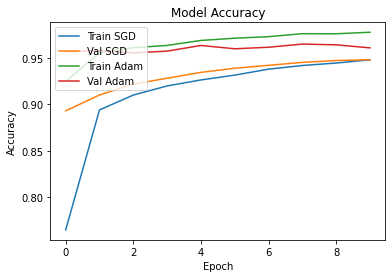

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=(784)),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compile the model with different optimizers
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])
history_sgd = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
history_adam = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Plot the training and validation accuracy for both optimizers
plt.plot(history_sgd.history["accuracy"])
plt.plot(history_sgd.history["val_accuracy"])
plt.plot(history_adam.history["accuracy"])
plt.plot(history_adam.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train SGD", "Val SGD", "Train Adam", "Val Adam"], loc="upper left")
plt.show()
